In [1]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('/Users/linyi/workspace/Artificial-intelligence-combat-tensorflow-notes/中国大学MOOCTF笔记2.1共享给所有学习者/class2/dot.csv')


In [2]:
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])
x_train = x_data
y_train = y_data.reshape(-1, 1)

In [3]:
Y_c = [['red' if y else 'blue'] for y in y_train]
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [4]:
# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))
lr = 0.01  # 学习率
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            # loss_regularization = tf.reduce_sum(tf.stack(loss_regularization))
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization #REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

epoch: 0 loss: 1.0147100687026978
epoch: 20 loss: 0.5180297493934631
epoch: 40 loss: 0.4503280818462372
epoch: 60 loss: 0.39710941910743713
epoch: 80 loss: 0.35293835401535034
epoch: 100 loss: 0.3152562379837036
epoch: 120 loss: 0.2828872799873352
epoch: 140 loss: 0.2548482418060303
epoch: 160 loss: 0.23049457371234894
epoch: 180 loss: 0.2091890275478363
epoch: 200 loss: 0.19074036180973053
epoch: 220 loss: 0.17432941496372223
epoch: 240 loss: 0.16017934679985046
epoch: 260 loss: 0.14778070151805878
epoch: 280 loss: 0.13611005246639252
epoch: 300 loss: 0.1267009675502777
epoch: 320 loss: 0.11890099197626114
epoch: 340 loss: 0.11230253428220749
epoch: 360 loss: 0.10656661540269852
epoch: 380 loss: 0.10073930025100708


*******predict*******
[[-3.   -3.   -3.   ... -3.   -3.   -3.  ]
 [-2.95 -2.95 -2.95 ... -2.95 -2.95 -2.95]
 [-2.9  -2.9  -2.9  ... -2.9  -2.9  -2.9 ]
 ...
 [ 2.85  2.85  2.85 ...  2.85  2.85  2.85]
 [ 2.9   2.9   2.9  ...  2.9   2.9   2.9 ]
 [ 2.95  2.95  2.95 ...  2.95  2.95  2.95]]
[[-3.   -2.95 -2.9  ...  2.85  2.9   2.95]
 [-3.   -2.95 -2.9  ...  2.85  2.9   2.95]
 [-3.   -2.95 -2.9  ...  2.85  2.9   2.95]
 ...
 [-3.   -2.95 -2.9  ...  2.85  2.9   2.95]
 [-3.   -2.95 -2.9  ...  2.85  2.9   2.95]
 [-3.   -2.95 -2.9  ...  2.85  2.9   2.95]]
[[-3.   -3.  ]
 [-3.   -2.95]
 [-3.   -2.9 ]
 ...
 [ 2.95  2.85]
 [ 2.95  2.9 ]
 [ 2.95  2.95]]


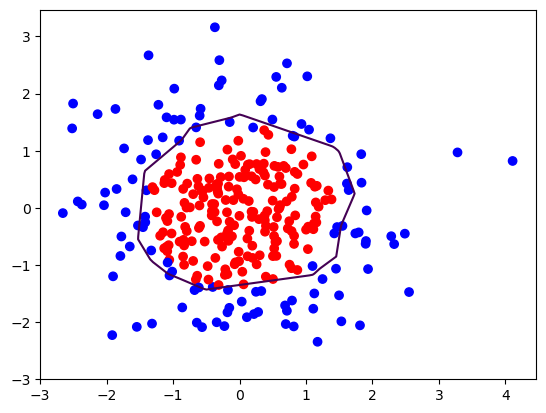

In [5]:
# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.05, -3:3:.05]
print(xx)
print(yy)
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid)
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
#print(np.array(probs))
probs = np.array(probs).reshape(xx.shape)
#print(xx.shape, yy.shape)
#print(probs)
plt.scatter(x1, x2, color=np.squeeze(Y_c)) #squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()